## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  

In [2]:
df_93 = pd.read_csv('data_93.csv')
df_93.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
#df_93.dropna(inplace=True)

In [4]:
df_93.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [5]:
df_93.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           23
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1265
B_avg_BODY_landed               1265
B_avg_CLINCH_att                1265
B_avg_CLINCH_landed             1265
B_avg_DISTANCE_att              1265
B_avg_DISTANCE_landed           1265
B_avg_GROUND_att                1265
B_avg_GROUND_landed             1265
B_avg_HEAD_att                  1265
B_avg_HEAD_landed               1265
B_avg_KD                        1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_PASS                      1265
B_avg_REV                       1265
B

In [6]:
list(df_93.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_av

# df_2003 

In [7]:
df_2003 = pd.read_csv('data_2003.csv')
df_2003.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [8]:
list(df_2003.columns)

['BPrev',
 'BStreak',
 'B_Age',
 'B_Height',
 'B_HomeTown',
 'B_ID',
 'B_Location',
 'B_Name',
 'B_Weight',
 'B__Round1_Grappling_Reversals_Landed',
 'B__Round1_Grappling_Standups_Landed',
 'B__Round1_Grappling_Submissions_Attempts',
 'B__Round1_Grappling_Takedowns_Attempts',
 'B__Round1_Grappling_Takedowns_Landed',
 'B__Round1_Strikes_Body Significant Strikes_Attempts',
 'B__Round1_Strikes_Body Significant Strikes_Landed',
 'B__Round1_Strikes_Body Total Strikes_Attempts',
 'B__Round1_Strikes_Body Total Strikes_Landed',
 'B__Round1_Strikes_Clinch Body Strikes_Attempts',
 'B__Round1_Strikes_Clinch Body Strikes_Landed',
 'B__Round1_Strikes_Clinch Head Strikes_Attempts',
 'B__Round1_Strikes_Clinch Head Strikes_Landed',
 'B__Round1_Strikes_Clinch Leg Strikes_Attempts',
 'B__Round1_Strikes_Clinch Leg Strikes_Landed',
 'B__Round1_Strikes_Clinch Significant Kicks_Attempts',
 'B__Round1_Strikes_Clinch Significant Kicks_Landed',
 'B__Round1_Strikes_Clinch Significant Punches_Attempts',
 'B__Rou

In [9]:
df_2003[df_2003['B__Round1_Grappling_Reversals_Landed'].isnull()].head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [10]:
df_2003.loc[0,'R_Name']

'Frank Mir'

In [11]:
df_2003.isnull().sum()

BPrev                                                       0
BStreak                                                     0
B_Age                                                      17
B_Height                                                   17
B_HomeTown                                                 17
B_ID                                                        0
B_Location                                                 13
B_Name                                                      0
B_Weight                                                   12
B__Round1_Grappling_Reversals_Landed                      671
B__Round1_Grappling_Standups_Landed                       671
B__Round1_Grappling_Submissions_Attempts                  671
B__Round1_Grappling_Takedowns_Attempts                    671
B__Round1_Grappling_Takedowns_Landed                      671
B__Round1_Strikes_Body Significant Strikes_Attempts       671
B__Round1_Strikes_Body Significant Strikes_Landed         671
B__Round

As we can see there are quite a lot of missing values. 

I want to try to drop these values and check with random forest the features importance.

After I'll try the same but instead of dropping values I'll substitute missing values with zeros.

Our label column will be the 'winner' one.
Let's check the kind of labels we have.

In [12]:
df_2003['winner'].value_counts(normalize=True)

red           0.572476
blue          0.410267
no contest    0.010354
draw          0.006903
Name: winner, dtype: float64

As we can see no contest and draw are less than 2% together so I'll remove them from the Database.

In [13]:
df_2003 = df_2003[(df_2003['winner'] != 'no contest') & (df_2003['winner'] != 'draw')]
df_2003['winner'].value_counts()

red     1327
blue     951
Name: winner, dtype: int64

### Remove nan values dropping rows

In [14]:
for x in df_2003.columns:
    if 'Round1' in x:
        df_2003.dropna(subset=[x], inplace=True)

In [16]:
df_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 352 to 2237
Columns: 894 entries, BPrev to winner
dtypes: float64(876), int64(9), object(9)
memory usage: 538.4+ KB


In [15]:
#df_2003.dropna(inplace=True)
df_2003.isnull().sum()

BPrev                                                     0
BStreak                                                   0
B_Age                                                     0
B_Height                                                  0
B_HomeTown                                                0
B_ID                                                      0
B_Location                                                0
B_Name                                                    0
B_Weight                                                  0
B__Round1_Grappling_Reversals_Landed                      0
B__Round1_Grappling_Standups_Landed                       0
B__Round1_Grappling_Submissions_Attempts                  0
B__Round1_Grappling_Takedowns_Attempts                    0
B__Round1_Grappling_Takedowns_Landed                      0
B__Round1_Strikes_Body Significant Strikes_Attempts       0
B__Round1_Strikes_Body Significant Strikes_Landed         0
B__Round1_Strikes_Body Total Strikes_Att

In [69]:
df_2003

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner,R1_TD_diff


# Grappling take difference

In [17]:
df_2003['R1_TD_diff'] = df_2003['R__Round1_Grappling_Takedowns_Attempts'] \
                        - df_2003['B__Round1_Grappling_Takedowns_Attempts']

In [18]:
import seaborn as sns

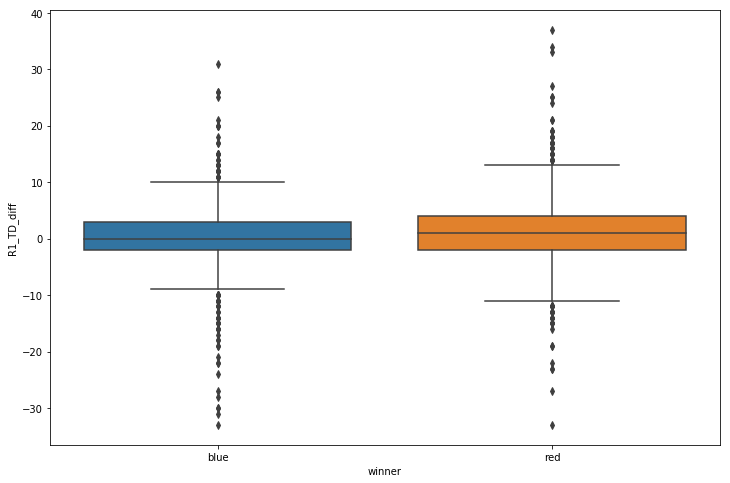

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='winner', y= 'R1_TD_diff', data=df_2003)

In [20]:
df_2003['R1_TD_diff']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
2288     NaN
2289     NaN
2290     NaN
2291     NaN
2292     NaN
2293    21.0
2294     4.0
2295     8.0
2296    12.0
2297     1.0
2298    -4.0
2299    -9.0
2300    -8.0
2301     1.0
2302    15.0
2303    -6.0
2304     5.0
2305    -1.0
2306    16.0
2307    -7.0
2308     0.0
2309    -6.0
2310     9.0
2311    -6.0
2312     5.0
2313   -11.0
2314     2.0
2315   -15.0
2316    -3.0
2317     NaN
Name: R1_TD_diff, Length: 2278, dtype: float64

# using only age as variable

In [21]:
df_2003_age = df_2003[['B_Age', 'R_Age', 'winner']]
df_2003_age.head()

,B_Age,R_Age,winner
0,38.0,39.0,blue
1,36.0,32.0,red
2,39.0,31.0,red
3,33.0,37.0,red
4,36.0,37.0,red


Next step we remove no contests and draws from the df

In [23]:
df_2003_age.dropna(subset=['B_Age', 'R_Age'], inplace=True)
df_2003_age.isnull().sum()

B_Age     0
R_Age     0
winner    0
dtype: int64

In [24]:
X = df_2003_age.drop('winner', axis=1)
y = df_2003_age['winner']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
clf.score(X_test, y_test)

0.6267857142857143

In [28]:
clf.score(X_train, y_train)

0.5905840286054828

# using random forest to check features importance

In [29]:
df_2003.head(3)

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner,R1_TD_diff
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue,NaN
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red,NaN
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red,NaN


In [30]:
X = df_2003.drop('winner', axis=1)
y = df_2003['winner']

In [31]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),

In [32]:
X.fillna(0, inplace=True)
X.isnull().sum()

BPrev                                                    0
BStreak                                                  0
B_Age                                                    0
B_Height                                                 0
B_ID                                                     0
B_Weight                                                 0
B__Round1_Grappling_Reversals_Landed                     0
B__Round1_Grappling_Standups_Landed                      0
B__Round1_Grappling_Submissions_Attempts                 0
B__Round1_Grappling_Takedowns_Attempts                   0
B__Round1_Grappling_Takedowns_Landed                     0
B__Round1_Strikes_Body Significant Strikes_Attempts      0
B__Round1_Strikes_Body Significant Strikes_Landed        0
B__Round1_Strikes_Body Total Strikes_Attempts            0
B__Round1_Strikes_Body Total Strikes_Landed              0
B__Round1_Strikes_Clinch Body Strikes_Attempts           0
B__Round1_Strikes_Clinch Body Strikes_Landed            

In [33]:
X.shape

(2278, 886)

In [34]:
y.shape

(2278,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2317
Columns: 886 entries, BPrev to R1_TD_diff
dtypes: float64(877), int64(9)
memory usage: 15.5 MB


In [37]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
B_Age,0.021518
Event_ID,0.021279
R_ID,0.020925
Fight_ID,0.017829
B_ID,0.017065
B_Height,0.013398
R_Weight,0.013159
R_Age,0.012860
B_Weight,0.012143
R_Height,0.011840


In [39]:
X.dropna(inplace=True)
X.isnull().sum()

BPrev                                                    0
BStreak                                                  0
B_Age                                                    0
B_Height                                                 0
B_ID                                                     0
B_Weight                                                 0
B__Round1_Grappling_Reversals_Landed                     0
B__Round1_Grappling_Standups_Landed                      0
B__Round1_Grappling_Submissions_Attempts                 0
B__Round1_Grappling_Takedowns_Attempts                   0
B__Round1_Grappling_Takedowns_Landed                     0
B__Round1_Strikes_Body Significant Strikes_Attempts      0
B__Round1_Strikes_Body Significant Strikes_Landed        0
B__Round1_Strikes_Body Total Strikes_Attempts            0
B__Round1_Strikes_Body Total Strikes_Landed              0
B__Round1_Strikes_Clinch Body Strikes_Attempts           0
B__Round1_Strikes_Clinch Body Strikes_Landed            

In [40]:
X.shape

(2278, 886)

In [41]:
y.shape

(2278,)

In [42]:
y.isnull().sum()

0

In [43]:
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

In [44]:
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [45]:
y.value_counts()

red     1327
blue     951
Name: winner, dtype: int64

Accuracy is :56.84210526315789

Confusion Matrix
----------------
Predicted  blue  red  All
True                     
blue         21  222  243
red          24  303  327
All          45  525  570


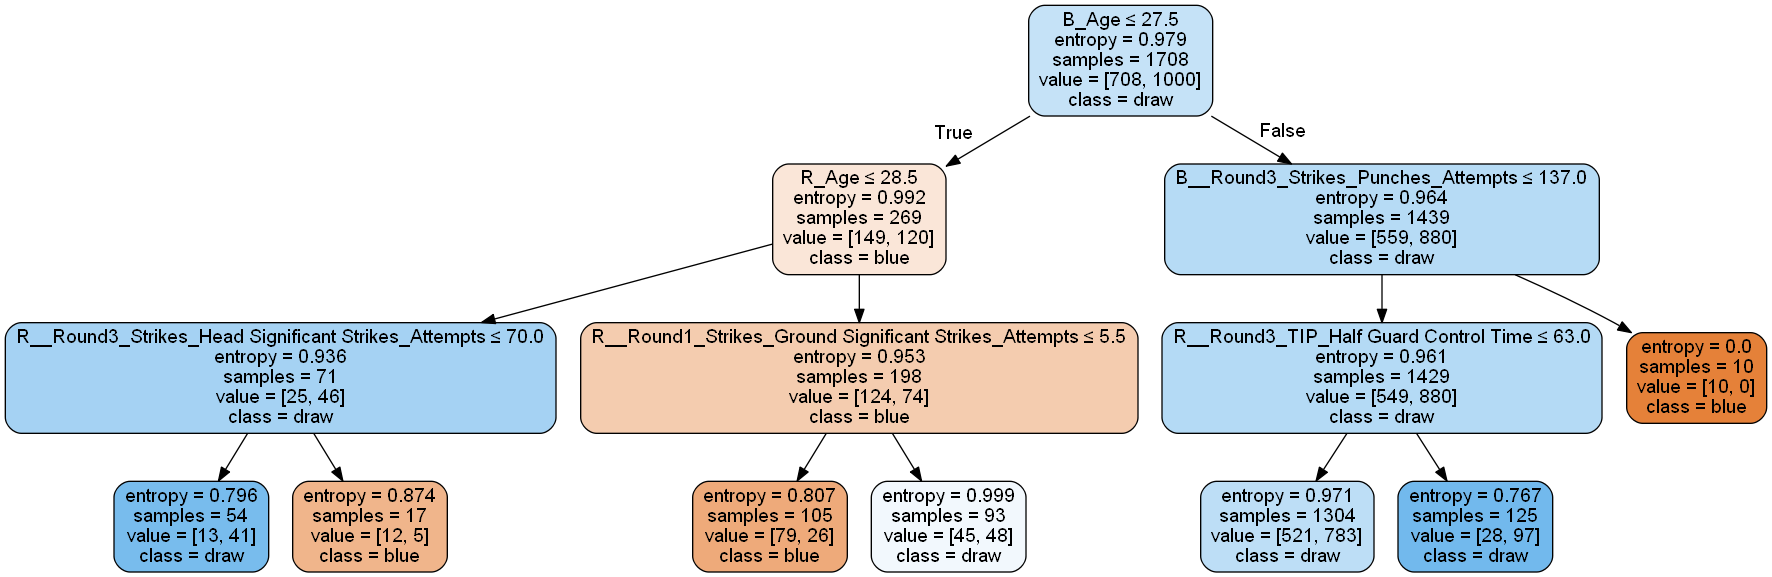

In [46]:
# Train a DT classifier
clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
clf_dec_tree.fit(X_train, y_train)  
# Make predictions for test data
y_pred = clf_dec_tree.predict(X_test) 
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Visualize the tree trained from complete dataset (optional)

dot_data = StringIO()
export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True, 
                feature_names=X.columns, class_names= ['blue', 'draw', 'no contest', 'red']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [47]:
new_df = df_2003[['B_Age', 'R_Age', 'B_Height', 'R_Height', 'winner']]
new_df.head()

,B_Age,R_Age,B_Height,R_Height,winner
0,38.0,39.0,193.0,190.0,blue
1,36.0,32.0,172.0,170.0,red
2,39.0,31.0,167.0,167.0,red
3,33.0,37.0,167.0,160.0,red
4,36.0,37.0,185.0,182.0,red


In [48]:
new_df_1 = new_df.copy()

In [49]:
new_df_1['age difference'] = new_df_1['R_Age'] - new_df_1['B_Age']
new_df_1.head(3)

,B_Age,R_Age,B_Height,R_Height,winner,age difference
0,38.0,39.0,193.0,190.0,blue,1.0
1,36.0,32.0,172.0,170.0,red,-4.0
2,39.0,31.0,167.0,167.0,red,-8.0


In [50]:
X = new_df.drop('winner', axis=1)
y = new_df['winner']

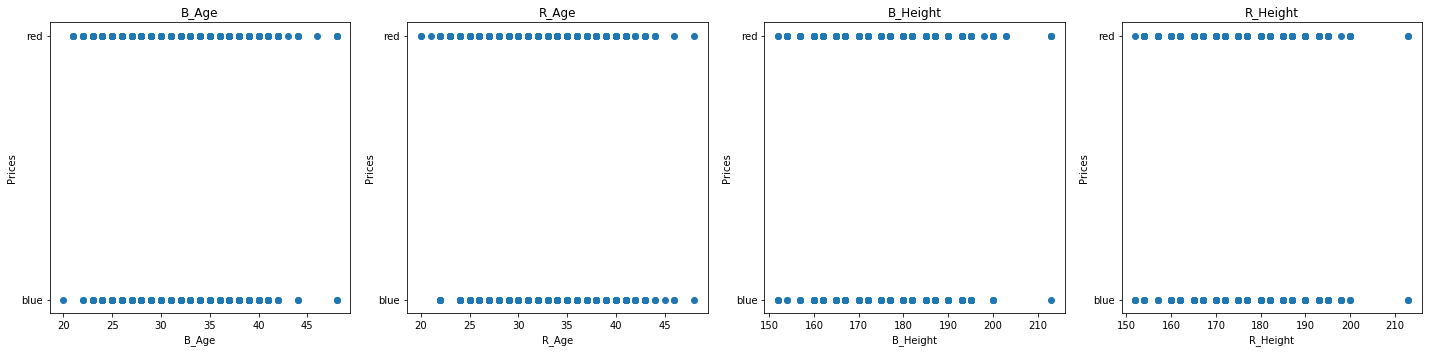

In [51]:
# Create scatter plots for each feature vs. target
plt.figure(figsize=(20, 5))
for i, col in enumerate(X.columns):
    plt.subplot(1, 4, i+1)
    plt.plot(new_df[col], y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

In [52]:
new_df['winner'].value_counts()

red     1327
blue     951
Name: winner, dtype: int64

In [53]:
df_no_cont = new_df[(new_df['winner'] != 'no contest') & (new_df['winner'] != 'draw')]
df_no_cont['winner'].value_counts()

red     1327
blue     951
Name: winner, dtype: int64

In [54]:
X.isnull().sum()

B_Age       17
R_Age       25
B_Height    17
R_Height    23
dtype: int64

In [55]:
X.fillna(value=0, inplace=True)
X.head()

,B_Age,R_Age,B_Height,R_Height
0,38.0,39.0,193.0,190.0
1,36.0,32.0,172.0,170.0
2,39.0,31.0,167.0,167.0
3,33.0,37.0,167.0,160.0
4,36.0,37.0,185.0,182.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Train a LogRegr classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
# Calculate Score
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(train_score)

0.6083138173302107


C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
def evaluate_models(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    # Train a LogRegr classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    # Calculate Score
    train_score_logreg = clf.score(X_train, y_train)
    test_score_logreg = clf.score(X_test, y_test)
    print("LogReg Train score: ", train_score_logreg)
    print("LogReg Test score: ", test_score_logreg)
    print("\n")
    # Train a DT classifier
    clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
    clf_dec_tree.fit(X_train, y_train)  
    # Make predictions for test data
    # Calculate Score
    train_score_dectree = clf_dec_tree.score(X_train, y_train)
    test_score_dectree = clf_dec_tree.score(X_test, y_test)
    print("DecTree Train score: ", train_score_dectree)
    print("DecTree Test score: ", test_score_dectree)
    print("\n")
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    # Visualize the tree trained from complete dataset
    
    dot_data = StringIO()
    export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    img = Image(graph.create_png())
    return img, name, train_score_logreg, test_score_logreg, train_score_dectree, test_score_dectree
    

In [58]:
im, nm, lr_train, lr_test, dt_train, dt_test = evaluate_models(X, y, 'model_age_feature')

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6083138173302107
LogReg Test score:  0.5929824561403508


DecTree Train score:  0.6176814988290398
DecTree Test score:  0.5719298245614035



Confusion Matrix
----------------
Predicted  blue  red  All
True                     
blue         21  222  243
red          24  303  327
All          45  525  570
